In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set dataset flag: 'mnist' or 'cifar10 or FashionMNIST'
dataset_name = 'mnist'  # Change to 'mnist' if needed
# CIFAR-10 class labels
#cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# Load and preprocess dataset
if dataset_name == 'mnist':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    input_shape = (28, 28, 1)
    num_classes = 10
    grayscale = True
elif dataset_name == 'cifar10':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    y_train = y_train.flatten()
    y_test = y_test.flatten()
    input_shape = (32, 32, 3)
    num_classes = 10
    grayscale = False
elif dataset_name == 'Fashionmnist':
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashionmnist.load_data()
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    input_shape = (28, 28, 1)
    num_classes = 10
    grayscale = True

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

In [5]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    # Removed the last MaxPooling2D layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 5
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.8403 - loss: 0.4681 - val_accuracy: 0.9658 - val_loss: 0.1107
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.9786 - loss: 0.0665 - val_accuracy: 0.9860 - val_loss: 0.0426
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.9866 - loss: 0.0420 - val_accuracy: 0.9895 - val_loss: 0.0347
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 41ms/step - accuracy: 0.9899 - loss: 0.0328 - val_accuracy: 0.9911 - val_loss: 0.0299
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - accuracy: 0.9919 - loss: 0.0258 - val_accuracy: 0.9885 - val_loss: 0.0368


In [13]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.9927 - loss: 0.0216 - val_accuracy: 0.9898 - val_loss: 0.0322
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.9948 - loss: 0.0172 - val_accuracy: 0.9905 - val_loss: 0.0325
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.9957 - loss: 0.0139 - val_accuracy: 0.9896 - val_loss: 0.0369
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.9954 - loss: 0.0136 - val_accuracy: 0.9910 - val_loss: 0.0298
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.9963 - loss: 0.0115 - val_accuracy: 0.9913 - val_loss: 0.0321
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9969 - loss: 0.0093 - val_accuracy: 0.9894 - val_loss: 0.0405
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.9975 - loss: 0.0083 - val_accuracy: 0.9903 - val_loss: 0.0355
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.9971 -

In [6]:
# Compile and train using GPU
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8414 - loss: 0.4805 - val_accuracy: 0.9814 - val_loss: 0.0577
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9791 - loss: 0.0686 - val_accuracy: 0.9877 - val_loss: 0.0426
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9850 - loss: 0.0456 - val_accuracy: 0.9872 - val_loss: 0.0430
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9897 - loss: 0.0345 - val_accuracy: 0.9886 - val_loss: 0.0369
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9911 - loss: 0.0291 - val_accuracy: 0.9809 - val_loss: 0.0599
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9928 - loss: 0.0217 - val_accuracy: 0.9910 - val_loss: 0.0310
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9948 - loss: 0.0169 - val_accuracy: 0.9907 - val_loss: 0.0307
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9944 - loss: 0.01

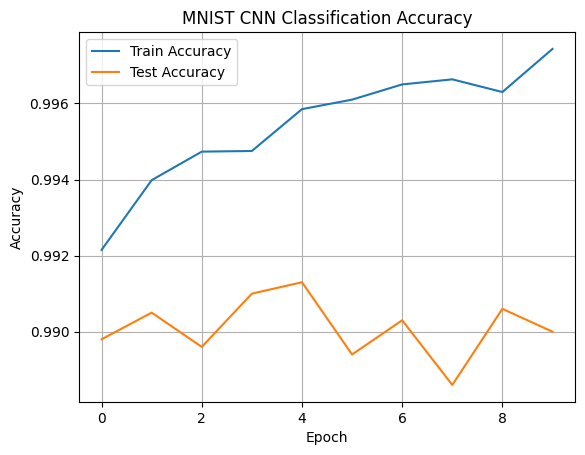

In [14]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title(f'{dataset_name.upper()} CNN Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


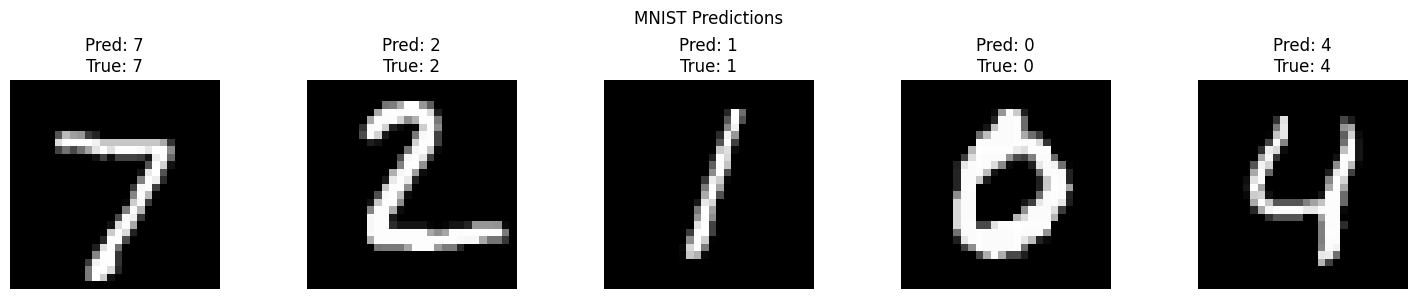

In [15]:
#Display & Predict Images
# ----------------------------

num_images = 5
plt.figure(figsize=(15, 3))

for i in range(num_images):
    image = X_test[i]
    label = y_test[i]
    prediction = model.predict(image.reshape(1, *input_shape))
    predicted_label = np.argmax(prediction)

    plt.subplot(1, num_images, i + 1)
    if grayscale:
        plt.imshow(image.squeeze(), cmap='gray')
    else:
        plt.imshow(image)

    if dataset_name == 'cifar10':
        pred_name = cifar10_labels[predicted_label]
        true_name = cifar10_labels[label]
        plt.title(f"Pred: {pred_name}\nTrue: {true_name}")
    else:
        plt.title(f"Pred: {predicted_label}\nTrue: {label}")
    plt.axis('off')

plt.suptitle(f'{dataset_name.upper()} Predictions')
plt.tight_layout()
plt.show()
